In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_data.csv")

In [ ]:
y = pd.read_csv("/content/pha_map.csv")

In [ ]:
df

,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
0,3.33,939.400000,0.090000,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.00
1,4.12,513.000000,0.155000,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.00
2,5.16,246.596000,0.214000,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.00
3,3.22,525.400000,0.422800,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.00
4,7.00,106.699000,0.274000,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311958,26.23,-31.270931,0.116500,10.355228,0.2989,1.412,0.990,5.87,185.95,139.87,19.31,1.83,0.5876,613.0,9.53
1311959,23.36,-22.712515,0.076847,22.010418,0.2517,1.727,1.292,15.82,190.64,154.93,6.06,2.16,0.4344,829.0,117.00
1311960,18.04,-5.177840,0.090914,25.318527,0.2493,2.424,1.820,5.73,15.03,337.95,252.37,3.03,0.2611,1380.0,318.00
1311961,18.50,-7.014612,0.090800,26.064191,0.2824,2.336,1.676,8.08,355.23,5.25,231.41,3.00,0.2761,1300.0,262.00


In [ ]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
from imblearn.over_sampling import KMeansSMOTE, SMOTE

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
kms = KMeansSMOTE(cluster_balance_threshold=0.01,random_state=42)
X_resampled, y_resampled = kms.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_resampled.shape

(2619186, 6)

In [ ]:
y_resampled.value_counts()

pha
0      1309593
1      1309593
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1      1048325
0      1047023
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262570
1      261268
Name: count, dtype: int64

In [ ]:
!pip install dask

In [ ]:
!python -m pip install dask distributed --upgrade

In [ ]:
from dask.distributed import Client
client = Client(n_workers=32)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-lsqrp9_k', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-edbs_m9f', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-_bjo7592', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-qdl8hjos', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-bzikuxif', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-d5tho_0q', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-ju90p4dr', purging
INFO:distrib

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 32
Total threads: 96,Total memory: 334.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40391,Workers: 32
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: Just now,Total memory: 334.56 GiB
Comm: tcp://127.0.0.1:39053,Total threads: 3
Dashboard: http://127.0.0.1:33915/status,Memory: 10.46 GiB
Nanny: tcp://127.0.0.1:38149,


In [ ]:
import joblib

In [ ]:
y_train = y_train.squeeze()
y_train

1205167    0
575514     0
1212305    0
1847891    1
1411332    1
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095348, dtype: int64

# Training with LightGBM

In [ ]:
lgb = LGBMClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lgb = LGBMClassifier()
param_grid = {
    'num_leaves': [30, 50, 70],
    'num_iterations': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}

rand3 = RandomizedSearchCV(lgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand3.fit(X_train,y_train)

In [ ]:
rand3.best_params_

{'num_leaves': 70,
 'num_iterations': 100,
 'max_depth': None,
 'learning_rate': 0.1}

In [ ]:
rand3.best_score_

0.9999522752215432

In [ ]:
##Training with best parameters
lgbest = LGBMClassifier(num_leaves= 70,
 num_iterations= 100,
 max_depth= None,
 learning_rate= 0.1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    lgbest.fit(X_train,y_train)

y_pred = lgbest.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 1048325, number of negative: 1047023
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2095348, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500311 -> initscore=0.001243
[LightGBM] [Info] Start training from score 0.001243


In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



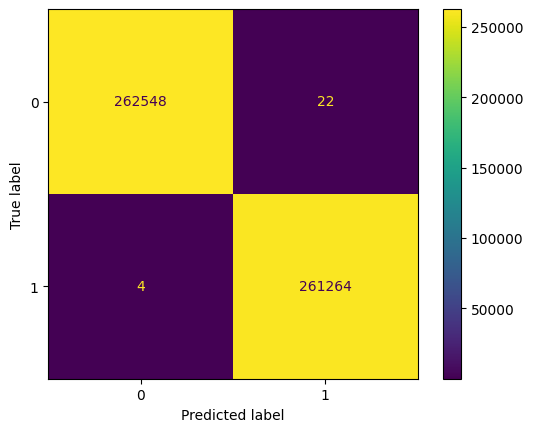

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=lgbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbest.classes_)
disp.plot()
plt.show()

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(lgbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

# Training with Random Forest

In [ ]:
rf = RandomForestClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

INFO:distributed.scheduler:Receive client connection: Client-worker-a2b05548-3abc-11ef-9a99-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40336
INFO:distributed.scheduler:Receive client connection: Client-worker-a2b0715a-3abc-11ef-9a6b-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40338
INFO:distributed.scheduler:Receive client connection: Client-worker-a313a560-3abc-11ef-9a3e-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40346
INFO:distributed.scheduler:Receive client connection: Client-worker-a32385b0-3abc-11ef-9aa8-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40356
INFO:distributed.scheduler:Receive client connection: Client-worker-a32e0e03-3abc-11ef-9ab0-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40362
INFO:distributed.scheduler:Receive client connection: Client-worker-a32e4570-3ab

In [ ]:
accuracy_score(y_test,y_pred)

0.9999732741801854

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262557,     13],
       [     1, 261267]])

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995049, 0.99999617]), array([0.99999617, 0.99995049]), array([262570, 261268]))


In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50]
}

rand = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

In [ ]:
rand.best_params_

{'n_estimators': 500, 'max_depth': 30}

In [ ]:
rand.best_score_

0.9999699333921231

In [ ]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 500, max_depth= 30)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rfbest.fit(X_train,y_train)

In [ ]:
y_pred = rfbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



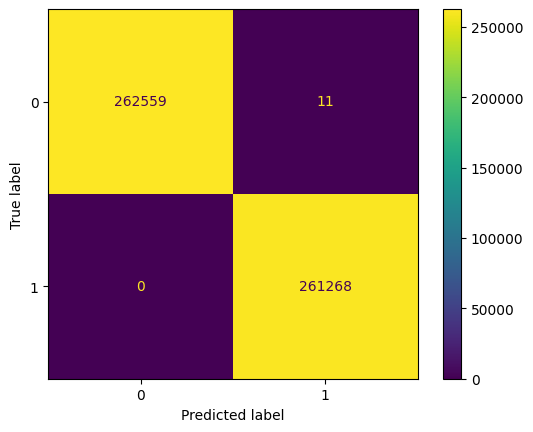

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

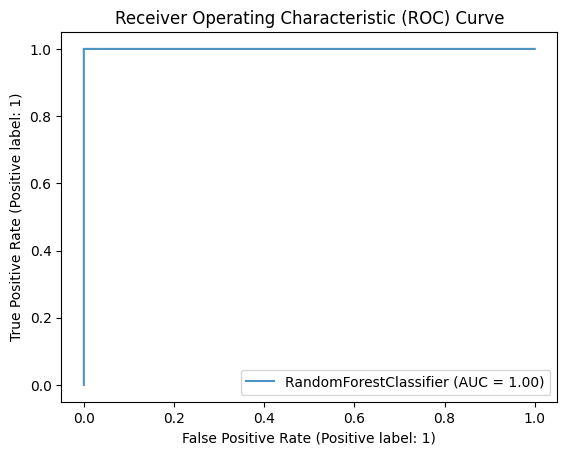

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995811, 1.        ]), array([1.        , 0.99995811]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999790532048596, 0.9999790532048596, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999790011415743, 0.9999790011415743, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999790011415743, 0.999979105268145, None)


In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9999102776049084

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262523,     47],
       [     0, 261268]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9999105000571276

# Training with AdaBoost

In [ ]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}
rand5 = RandomizedSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand5.fit(X_train,y_train)

In [ ]:
rand5.best_params_

{'n_estimators': 200, 'learning_rate': 1}

In [ ]:
rand5.best_score_

0.9999494117460873

In [ ]:
##Training with best parameters
adabest = AdaBoostClassifier(n_estimators=200, learning_rate=1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    adabest.fit(X_train,y_train)

y_pred = adabest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



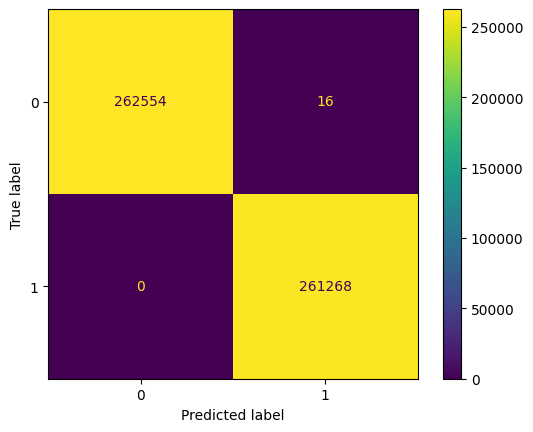

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=adabest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adabest.classes_)
disp.plot()
plt.show()

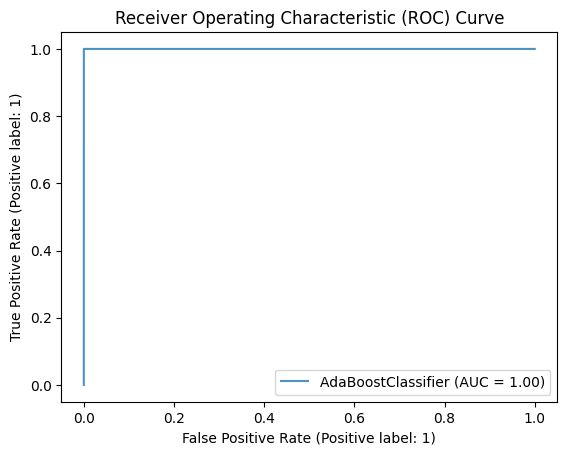

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(adabest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99993906, 1.        ]), array([1.        , 0.99993906]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999695319343413, 0.9999695319343413, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999694562059263, 0.9999694562059263, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999694562059263, 0.9999696076627564, None)


# Oversampling using SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1      1048325
0      1047023
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262570
1      261268
Name: count, dtype: int64

In [ ]:
y_train = y_train.squeeze()
y_train

1205167    0
575514     0
1212305    0
1847891    1
1411332    1
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095348, dtype: int64

# Training with Random Forest

In [ ]:
rf = RandomForestClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

INFO:distributed.scheduler:Receive client connection: Client-worker-23a920ff-3cf7-11ef-8263-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49658
INFO:distributed.scheduler:Receive client connection: Client-worker-23a7baa5-3cf7-11ef-822f-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49672
INFO:distributed.scheduler:Receive client connection: Client-worker-23ff161e-3cf7-11ef-8217-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49676
INFO:distributed.scheduler:Receive client connection: Client-worker-24056ac9-3cf7-11ef-8267-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49686
INFO:distributed.scheduler:Receive client connection: Client-worker-24099a1a-3cf7-11ef-8247-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49688
INFO:distributed.scheduler:Receive client connection: Client-worker-240aae67-3cf

In [ ]:
accuracy_score(y_test,y_pred)

0.9999790011415743

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262559,     11],
       [     0, 261268]])

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995811, 1.        ]), array([1.        , 0.99995811]), array([262570, 261268]))


In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50]
}

rand = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

In [ ]:
rand.best_params_

{'n_estimators': 200, 'max_depth': 20}

In [ ]:
rand.best_score_

0.9999675471525171

In [ ]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 200, max_depth= 20)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rfbest.fit(X_train,y_train)

In [ ]:
y_pred = rfbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



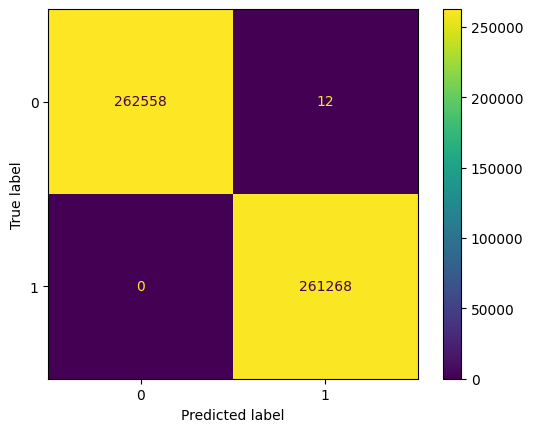

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

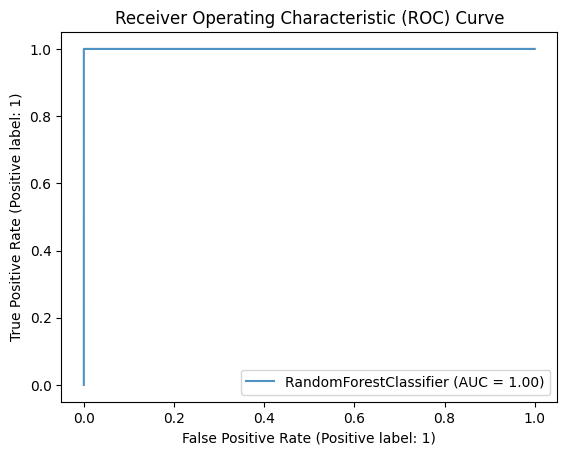

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.9999543, 1.       ]), array([1.       , 0.9999543]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999771489507561, 0.9999771489507561, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999770921544447, 0.9999770921544447, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999770921544447, 0.9999772057470673, None)


In [1]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

NameError: name 'AdaBoostClassifier' is not defined

In [2]:
accuracy_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

In [3]:
confusion_matrix(y_test,y_pred)

NameError: name 'confusion_matrix' is not defined

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}

rand5 = RandomizedSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand5.fit(X_train,y_train)

In [ ]:
rand5.best_params_

In [4]:
rand5.best_score_

NameError: name 'rand5' is not defined

In [ ]:
##Training with best parameters
adabest = AdaBoostClassifier(n_estimators=500, learning_rate=1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    adabest.fit(X_train,y_train)

y_pred = adabest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



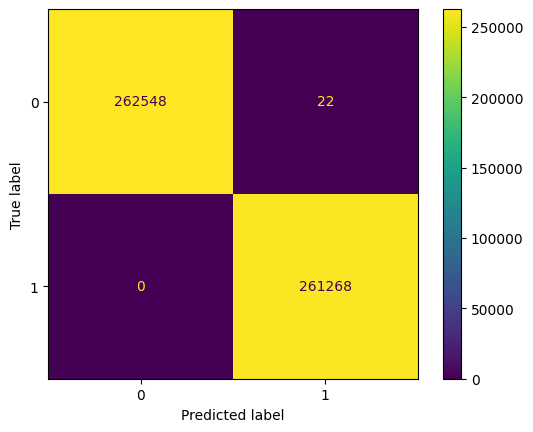

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=adabest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adabest.classes_)
disp.plot()
plt.show()

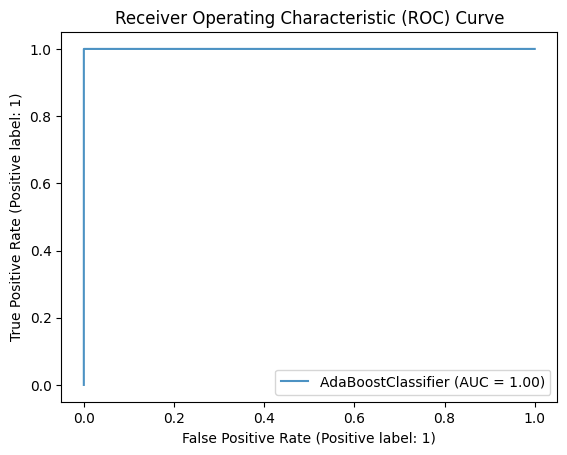

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(adabest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99991621, 1.        ]), array([1.        , 0.99991621]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999581064097194, 0.9999581064097194, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999580022831486, 0.9999580022831486, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999580022831486, 0.9999582105362901, None)
